In [10]:
import pandas as pd

In [11]:
data1=pd.read_excel('附件1.xlsx')
data1

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇(袋)(4),1011010801,食用菌
247,106971533450003,海鲜菇(包),1011010801,食用菌
248,106971533455008,海鲜菇(袋)(3),1011010801,食用菌
249,106973223300667,虫草花(盒)(2),1011010801,食用菌


In [12]:
data2=pd.read_csv('附件2.csv',encoding='gbk')
data2

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


In [13]:
data2.columns


Index(['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售'], dtype='object')

In [14]:
#基于单品编码列合并两个数据集
merged_data = pd.merge(data1, data2, left_on="单品编码", right_on="单品编码", how="outer")

merged_data


merged_data

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...
878503,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,1.000,1.5,销售,是
878504,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,1.000,2.5,销售,否
878505,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,1.000,1.5,销售,是
878506,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,1.000,2.5,销售,否


根据单品编码合并附件1和附件2。

使用Kruskal-Wallis检验分析不同品类之间销售量的差异。

对于Kruskal-Wallis检验中发现的显著差异，使用Mann-Whitney U检验进行事后多重分析。

In [15]:
merged_data.isnull().sum()

单品编码          0
单品名称          0
分类编码          0
分类名称          0
销售日期          5
扫码销售时间        5
销量(千克)        5
销售单价(元/千克)    5
销售类型          5
是否打折销售        5
dtype: int64

In [16]:
from scipy.stats import kruskal

# 按类别分组数据并提取每个类别的销售量
groups = [df["销量(千克)"].dropna().values for _, df in merged_data.groupby("分类名称")]

# 进行Kruskal-Wallis测试
kruskal_result = kruskal(*groups)

kruskal_result


KruskalResult(statistic=52273.963168938884, pvalue=0.0)

In [17]:
groups

[array([0.407, 0.438, 0.401, ..., 0.53 , 0.152, 0.328]),
 array([0.743, 0.502, 0.301, ..., 1.   , 1.   , 1.   ]),
 array([0.329, 0.522, 0.236, ..., 0.455, 0.501, 0.485]),
 array([0.585, 0.719, 0.652, ..., 0.485, 0.368, 0.523]),
 array([0.326, 0.342, 0.2  , ..., 0.309, 0.343, 0.334]),
 array([0.195, 0.428, 0.239, ..., 1.   , 1.   , 1.   ])]

In [23]:
import numpy as np
#透视数据以按日期获取每个类别的销售额
pivot_data = merged_data.pivot_table(index="销售日期", columns="分类名称", values="销量(千克)", aggfunc=np.sum)

# 删除Kendall测试的NaN值行
pivot_data_clean = pivot_data.dropna()
pivot_data_clean

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
销售日期,,,,,,
2020-07-01,4.850,205.402,46.640,35.374,76.715,35.365
2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2020-07-03,9.572,190.779,42.076,35.896,64.253,42.442
2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742


In [39]:
dd=pd.DataFrame()
for i in pivot_data_clean.columns:
    ddd=pd.concat([pd.DataFrame(pivot_data_clean[i].values),pd.DataFrame([[i]*1049]).T],axis=1)
    dd=pd.concat([dd,ddd],axis=0)

In [41]:
dd.columns=['销售量','品类']

In [42]:
dd.to_csv('code1data.csv',index=None)

Kruskal-Wallis检验的结果显示统计量为52273.96，p值为0.0。这意味着我们可以拒绝原假设，认为不同品类的销售量之间存在统计学上的差异。

接下来，我们将使用Mann-Whitney U检验进行事后多重分析，以确定哪些品类组之间的差异是显著的。为了纠正多重比较可能导致的问题，我们将使用Bonferroni校正。

In [44]:
import itertools
from scipy.stats import mannwhitneyu 
#以列表形式获取组合以计算比较次数
combinations_gbk = list(itertools.combinations(range(len(groups)), 2))
num_comparisons_gbk = len(combinations_gbk)

# Bonferroni校正α
alpha_corrected_gbk = 0.05 / num_comparisons_gbk

significant_pairs_gbk = []

# 遍历所有组的组合并进行Mann-Whitney U测试
for (idx1, idx2) in combinations_gbk:
    stat, p = mannwhitneyu(groups[idx1], groups[idx2])
    if p < alpha_corrected_gbk:
        significant_pairs_gbk.append((idx1, idx2, p))

significant_pairs_gbk


[(0, 1, 0.0),
 (0, 2, 0.0),
 (0, 3, 0.0),
 (0, 4, 0.0),
 (0, 5, 0.0),
 (1, 2, 0.0),
 (1, 3, 0.0),
 (1, 4, 0.0),
 (1, 5, 0.0),
 (2, 3, 3.091271913511233e-25),
 (2, 4, 0.0),
 (2, 5, 0.0),
 (3, 4, 0.0),
 (3, 5, 0.0),
 (4, 5, 7.636231690783949e-299)]

In [45]:
category_names = merged_data.groupby("分类名称").groups.keys()

In [46]:
#将类别名称转换为列表以进行索引
category_names_list = list(category_names)

significant_pairs_names = [(category_names_list[idx1], category_names_list[idx2], p) for idx1, idx2, p in significant_pairs_gbk]

significant_pairs_names


[('水生根茎类', '花叶类', 0.0),
 ('水生根茎类', '花菜类', 0.0),
 ('水生根茎类', '茄类', 0.0),
 ('水生根茎类', '辣椒类', 0.0),
 ('水生根茎类', '食用菌', 0.0),
 ('花叶类', '花菜类', 0.0),
 ('花叶类', '茄类', 0.0),
 ('花叶类', '辣椒类', 0.0),
 ('花叶类', '食用菌', 0.0),
 ('花菜类', '茄类', 3.091271913511233e-25),
 ('花菜类', '辣椒类', 0.0),
 ('花菜类', '食用菌', 0.0),
 ('茄类', '辣椒类', 0.0),
 ('茄类', '食用菌', 0.0),
 ('辣椒类', '食用菌', 7.636231690783949e-299)]

经过Mann-Whitney U检验和Bonferroni校正，我们发现以上品类之间的销售量存在显著差异：

In [47]:
import pandas as pd
from scipy.stats import kendalltau


# 使用pivot_table将数据重排
pivot_df = pivot_data_clean.reset_index().melt(id_vars='销售日期', var_name='Observer', value_name='Rank')

pivot_data = merged_data.pivot_table(index="销售日期", columns="单品名称", values="销量(千克)", aggfunc=np.sum)

# 计算Kendall's Tau系数和p值
tau, p_value = kendalltau(pivot_df['销售日期'], pivot_df['Rank'])

print("Kendall's Tau系数:", tau)
print("p值:", p_value)


Kendall's Tau系数: -0.010593253225296164
p值: 0.20775313691316966


In [48]:
# 计算每对类别的Spearman相关性
spearman_matrix = pivot_data_clean.corr(method="spearman")

spearman_matrix


分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
分类名称,,,,,,
水生根茎类,1.000000,0.429652,0.388339,-0.193596,0.314993,0.601349
花叶类,0.429652,1.000000,0.625249,0.324940,0.584052,0.590563
花菜类,0.388339,0.625249,1.000000,0.234884,0.416279,0.456475
茄类,-0.193596,0.324940,0.234884,1.000000,0.153253,-0.091212
辣椒类,0.314993,0.584052,0.416279,0.153253,1.000000,0.523828
食用菌,0.601349,0.590563,0.456475,-0.091212,0.523828,1.000000


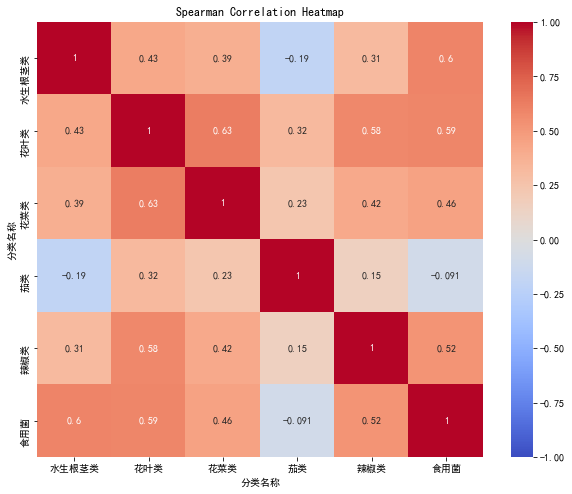

In [49]:
# 绘制各个变量之间的相关性
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.savefig('Correlation.jpg')
plt.show()
